In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import json

In [2]:
with open('/content/drive/MyDrive/CASE_IFOOD/Spotify/YourLibrary.json') as json_data:
    data = json.load(json_data)

# Base de Dados Your Library

In [3]:
df = pd.DataFrame(data['tracks'])
df

,artist,album,track
0,JAY-Z,Collision Course,Izzo / In the End
1,Sebastian Ingrosso,Calling (Lose My Mind),Calling (Lose My Mind) - Radio Edit
2,Capital Inicial,Rosas e Vinho Tinto,À Sua Maneira (De Música Ligeira)
3,Seu Jorge,"Musicas Para Churrasco, Vol. 1",Amiga Da Minha Mulher
4,Armin van Buuren,Not Giving Up On Love,Not Giving Up On Love - Radio Edit
...,...,...,...
295,Armin van Buuren,Intense,Intense (feat. Miri Ben-Ari)
296,"Earth, Wind & Fire",The Eternal Dance,September
297,Ne-Yo,Because Of You,Because Of You
298,Madonna,American Life,Die Another Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  300 non-null    object
 1   album   300 non-null    object
 2   track   300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB


In [5]:
df['artist'].value_counts()

Metallica           11
Maroon 5             6
Armin van Buuren     6
Calvin Harris        5
Lasgo                5
                    ..
Sophie Sugar         1
Nego do Borel        1
John O'Callaghan     1
OneRepublic          1
LMFAO                1
Name: artist, Length: 196, dtype: int64

In [6]:
df['album'].value_counts()

The Metallica Collection                                                                  5
The Rising Tied                                                                           4
Some Things                                                                               4
Master Of Puppets                                                                         3
BIGBANG Special Edition                                                                   3
                                                                                         ..
Dynasty                                                                                   1
Piece Of Mind                                                                             1
My Life Is Going On (Música Original De La Serie De TV La Casa De Papel / Money Heist)    1
Born To Die - The Paradise Edition                                                        1
Calling (Lose My Mind)                                                          

In [7]:
df['track'].value_counts()

Alone                                                 2
Rather Be (feat. Jess Glynne)                         2
Fast Car                                              2
Photograph                                            2
Clarity                                               2
                                                     ..
Kids                                                  1
Can't Take My Eyes Off of You - Black Box Mix         1
Wiggle (feat. Snoop Dogg)                             1
Beautiful Things (Gabriel & Dresden Unplugged Mix)    1
Medo Bobo - Ao Vivo                                   1
Name: track, Length: 292, dtype: int64

# Base de Dados Streaming History

In [8]:
df2 = pd.read_json('/content/drive/MyDrive/CASE_IFOOD/Spotify/StreamingHistory0.json')
df2

,endTime,artistName,trackName,msPlayed
0,2020-01-31 03:00,Clean Bandit,Symphony (feat. Zara Larsson),206101
1,2020-08-26 11:36,Queen,Bohemian Rhapsody - Remastered 2011,354320
2,2020-10-04 22:24,Beau Diako,Kyiv,157585
3,2020-10-04 22:27,invention_,Sonar,148937
4,2020-10-05 00:12,xander.,Where We Met,66004
5,2020-11-01 20:18,dryhope,Envision,139677
6,2020-11-01 20:19,Moods,Where I Met You,33089
7,2020-11-04 22:44,Maroon 5,Memories,189486
8,2020-11-04 22:48,Maroon 5,Nobody's Love,211253
9,2020-11-04 22:52,Maroon 5,Payphone,231173


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     22 non-null     object
 1   artistName  22 non-null     object
 2   trackName   22 non-null     object
 3   msPlayed    22 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 832.0+ bytes


In [10]:
df2.describe()

,msPlayed
count,22.000000
mean,190964.954545
std,80283.116253
min,3159.000000
25%,151099.000000
50%,208726.500000
75%,231133.000000
max,354320.000000


## Tratamento dos dados

### Transformação dos tipos de objetos

In [11]:
df2['endTime'] = df2['endTime'].astype('datetime64')

### Criação de colunas de ano, mês, dia da semana, hora.

In [12]:
df2['ano'] = df2['endTime'].dt.year
df2['mes'] = df2['endTime'].dt.month
df2['dia'] = df2['endTime'].dt.day
df2['diaSemana'] = df2['endTime'].dt.weekday
df2['tempo'] = df2['endTime'].dt.time
df2['horas'] = df2['endTime'].dt.hour
df2['nomeDia'] = df2['endTime'].dt.day_name()

In [13]:
df2.head()

,endTime,artistName,trackName,msPlayed,ano,mes,dia,diaSemana,tempo,horas,nomeDia
0,2020-01-31 03:00:00,Clean Bandit,Symphony (feat. Zara Larsson),206101,2020,1,31,4,03:00:00,3,Friday
1,2020-08-26 11:36:00,Queen,Bohemian Rhapsody - Remastered 2011,354320,2020,8,26,2,11:36:00,11,Wednesday
2,2020-10-04 22:24:00,Beau Diako,Kyiv,157585,2020,10,4,6,22:24:00,22,Sunday
3,2020-10-04 22:27:00,invention_,Sonar,148937,2020,10,4,6,22:27:00,22,Sunday
4,2020-10-05 00:12:00,xander.,Where We Met,66004,2020,10,5,0,00:12:00,0,Monday


### Ajustando dia da semana e meses.

In [14]:
mes = {	
    1:'Janeiro',
		2:'Fevereiro',
		3:'Março',
		4:'Abril',
		5:'Maio',
		6:'Junho',
		7:'Julho',
		8:'Agosto',
		9:'Setembro',
		10:'Outubro',
		11:'Novembro',
		12:'Dezembro'		
}

df2["mes"].replace(mes, inplace=True)
df2.head()

,endTime,artistName,trackName,msPlayed,ano,mes,dia,diaSemana,tempo,horas,nomeDia
0,2020-01-31 03:00:00,Clean Bandit,Symphony (feat. Zara Larsson),206101,2020,Janeiro,31,4,03:00:00,3,Friday
1,2020-08-26 11:36:00,Queen,Bohemian Rhapsody - Remastered 2011,354320,2020,Agosto,26,2,11:36:00,11,Wednesday
2,2020-10-04 22:24:00,Beau Diako,Kyiv,157585,2020,Outubro,4,6,22:24:00,22,Sunday
3,2020-10-04 22:27:00,invention_,Sonar,148937,2020,Outubro,4,6,22:27:00,22,Sunday
4,2020-10-05 00:12:00,xander.,Where We Met,66004,2020,Outubro,5,0,00:12:00,0,Monday


In [15]:
nomeDia = {	
    'Sunday':'Domingo',
		'Monday':'Segunda',
		'Tuesday':'Terça',
		'Wednesday':'Quarta',
		'Thursday':'Quinta',
		'Friday':'Sexta',
		'Saturday':'Sabado'		
}

df2["nomeDia"].replace(nomeDia, inplace=True)
df2.head()

,endTime,artistName,trackName,msPlayed,ano,mes,dia,diaSemana,tempo,horas,nomeDia
0,2020-01-31 03:00:00,Clean Bandit,Symphony (feat. Zara Larsson),206101,2020,Janeiro,31,4,03:00:00,3,Sexta
1,2020-08-26 11:36:00,Queen,Bohemian Rhapsody - Remastered 2011,354320,2020,Agosto,26,2,11:36:00,11,Quarta
2,2020-10-04 22:24:00,Beau Diako,Kyiv,157585,2020,Outubro,4,6,22:24:00,22,Domingo
3,2020-10-04 22:27:00,invention_,Sonar,148937,2020,Outubro,4,6,22:27:00,22,Domingo
4,2020-10-05 00:12:00,xander.,Where We Met,66004,2020,Outubro,5,0,00:12:00,0,Segunda


In [16]:
df2['tempoEscutado(h)'] = df2['msPlayed'].map(lambda x: x/(3600000) ).round(4)
df2['tempoEscutado(min)'] = df2['msPlayed'].map(lambda x: x/60000).round(4)
df2.head()

,endTime,artistName,trackName,msPlayed,ano,mes,dia,diaSemana,tempo,horas,nomeDia,tempoEscutado(h),tempoEscutado(min)
0,2020-01-31 03:00:00,Clean Bandit,Symphony (feat. Zara Larsson),206101,2020,Janeiro,31,4,03:00:00,3,Sexta,0.0573,3.4350
1,2020-08-26 11:36:00,Queen,Bohemian Rhapsody - Remastered 2011,354320,2020,Agosto,26,2,11:36:00,11,Quarta,0.0984,5.9053
2,2020-10-04 22:24:00,Beau Diako,Kyiv,157585,2020,Outubro,4,6,22:24:00,22,Domingo,0.0438,2.6264
3,2020-10-04 22:27:00,invention_,Sonar,148937,2020,Outubro,4,6,22:27:00,22,Domingo,0.0414,2.4823
4,2020-10-05 00:12:00,xander.,Where We Met,66004,2020,Outubro,5,0,00:12:00,0,Segunda,0.0183,1.1001


### Analisando as preferências

In [17]:
dias = df2['nomeDia'].value_counts()
dias

Quarta     9
Sexta      7
Domingo    4
Segunda    1
Quinta     1
Name: nomeDia, dtype: int64

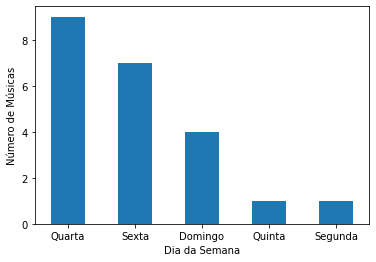

In [18]:
dias.sort_values(ascending=False).plot(kind='bar', rot=0, xlabel = "Dia da Semana", ylabel='Número de Músicas');

In [19]:
meses = df2['mes'].value_counts()
meses

Novembro    11
Dezembro     6
Outubro      3
Agosto       1
Janeiro      1
Name: mes, dtype: int64

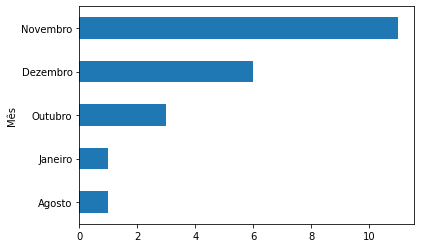

In [20]:
meses.sort_values(ascending=True).plot(kind='barh', rot=0,  xlabel = "Mês", ylabel='Número de Músicas');

In [21]:
df2['trackName'].value_counts()

Memories                               1
Animals                                1
Envision                               1
I Feel It Coming                       1
Promises (with Sam Smith)              1
Clarity                                1
Sugar                                  1
Chandelier                             1
Nobody's Love                          1
Where I Met You                        1
Sonar                                  1
Loka                                   1
This Love                              1
Bohemian Rhapsody - Remastered 2011    1
She Will Be Loved - Radio Mix          1
Kyiv                                   1
Maps                                   1
Girls Like You (feat. Cardi B)         1
Symphony (feat. Zara Larsson)          1
Good For You                           1
Payphone                               1
Where We Met                           1
Name: trackName, dtype: int64

In [22]:
artista = df2['artistName'].value_counts()
artista

Maroon 5            9
xander.             1
Clean Bandit        1
invention_          1
Calvin Harris       1
dryhope             1
Moods               1
Simone & Simaria    1
The Weeknd          1
Queen               1
Selena Gomez        1
Beau Diako          1
Sia                 1
Zedd                1
Name: artistName, dtype: int64

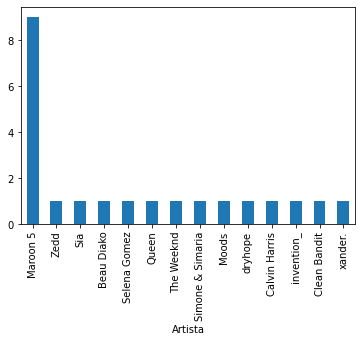

In [23]:
artista.sort_values(ascending=False).plot(kind='bar', xlabel = "Artista");

### Tempo total de músicas escutadas (em horas)

In [24]:
tempo = df2['tempoEscutado(h)'].sum()
tempo

1.1671999999999998

### Wordcloud dos artistas favoritos

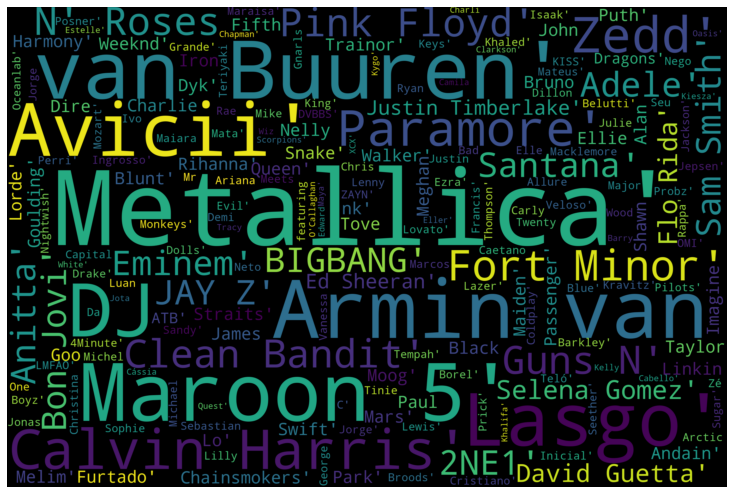

In [25]:
fav_art = df.artist.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(fav_art))
fig = plt.figure(
    figsize = (10, 20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
#df.to_csv('/content/drive/MyDrive/CASE_IFOOD/Dados_Finais/spotify_case_ifood_streaming.csv')

In [27]:
#df2.to_csv('/content/drive/MyDrive/CASE_IFOOD/Dados_Finais/spotify_case_ifood_library.csv')